### IMPORTING  LIBRARIES & DATASET

In [86]:
import pandas as pd               # to import dataset and create data frames
import numpy as np                # for solving complex mathematical problems
import matplotlib.pyplot as plt   # tool for data visualization & representation
import seaborn as sns             # based on matplotlib, but with more colourful themes


import statsmodels.api as smapi      
from sklearn.linear_model import LinearRegression
# NOTE: we can use any of the above library for linear regression model,
#       but i am using scikit_learn because its best for big data (no. of observations > 1000)

In [156]:
data = pd.read_csv(r"C:\Users\anika\OneDrive\Desktop\data_science\Housing Price Prediction.csv")

In [157]:
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  9106000005  5/27/2015  1310000.0         4       2.25         3750   
1  5101400871  5/24/2015   445500.0         2       1.75         1390   
2  7923600250  5/15/2015   450000.0         5       2.00         1870   
3  8730000270  5/14/2015   359000.0         2       2.75         1370   
4  9178601660  5/14/2015  1700000.0         5       3.00         3320   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     2.0           0     0  ...      8        2440           1310   
1      6670     1.0           0     0  ...      6         720            670   
2      7344     1.5           0     0  ...      7        1870              0   
3      1140     2.0           0     0  ...      8        1080            290   
4      5354     2.0           0     0  ...      9        3320              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1924             0    98115  47.6747 -122.303           2170   
1      1941             0    98115  47.6914 -122.308            920   
2      1960             0    98007  47.5951 -122.144           1870   
3      2009             0    98133  47.7052 -122.343           1370   
4      2004             0    98103  47.6542 -122.331           2330   

   sqft_lot15  
0        4590  
1        6380  
2        7650  
3        1090  
4        4040  

[5 rows x 21 columns]

In [30]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Text(0, 0.5, 'Count')

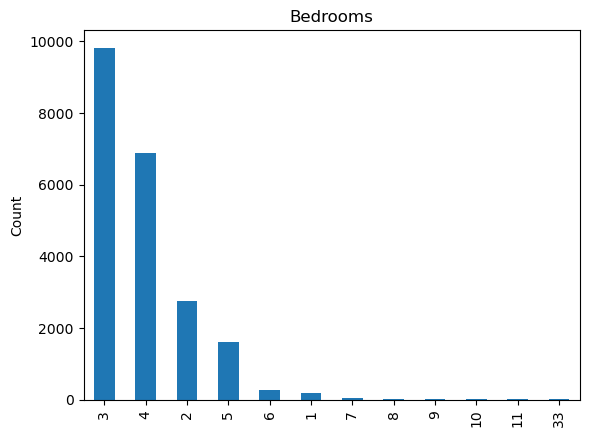

In [31]:
data['bedrooms'].value_counts().plot(kind = 'bar')
plt.title('NUMBER OF BEDROOMS')
plt.title('Bedrooms')
plt.ylabel('Count')

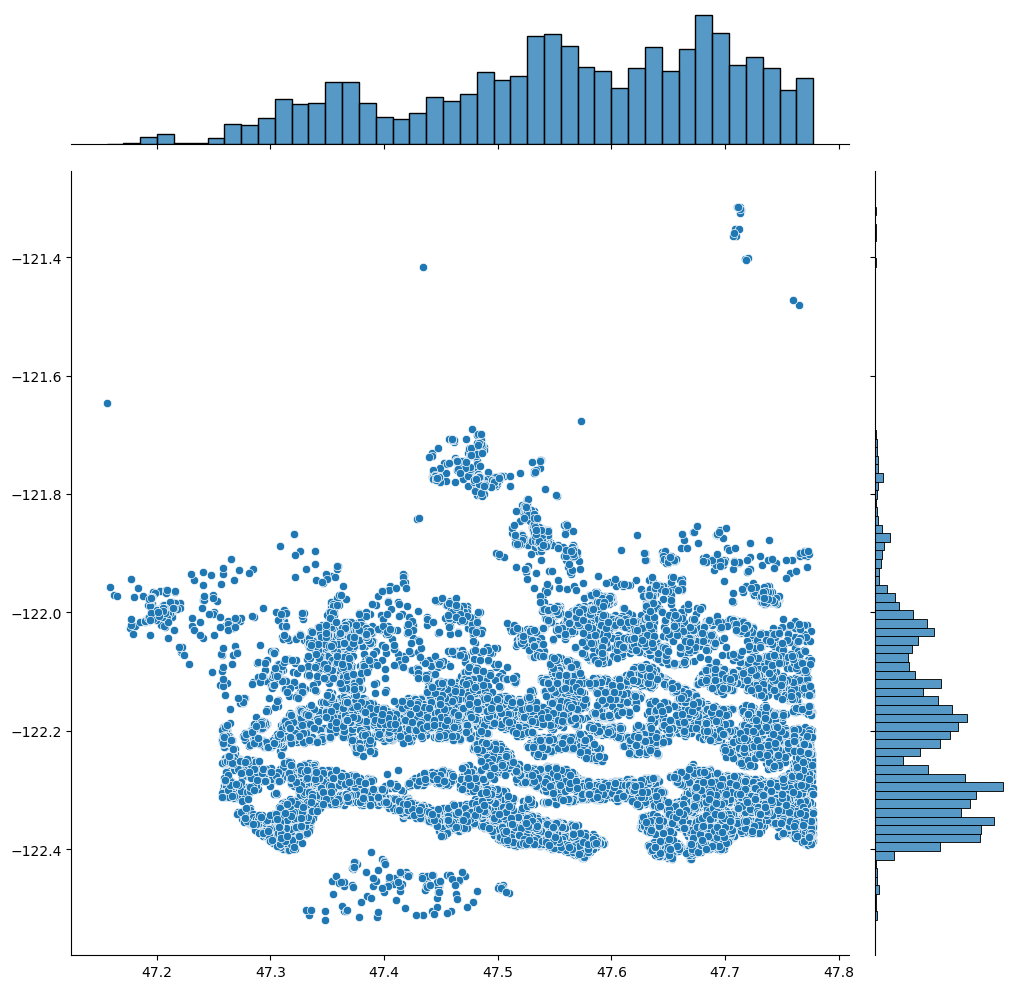

In [50]:
sns.jointplot(x = data.lat.values, y = data.long.values, height = 10)

In [73]:
data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.002727  0.266398 -0.006834   0.063744     0.103854  0.021632   
view           0.011536  0.397370  0.080008   0.188386     0.284709  0.074900   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.005193  0.323799  0.302808   0.283440     0.435130  0.015418   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.016925  0.126424  0.018389   0.050544     0.055308  0.007686   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.002727  0.011536  -0.023803  0.008188   
price          0.256804    0.266398  0.397370   0.036056  0.667951   
bedrooms       0.177944   -0.006834  0.080008   0.026496  0.356563   
bathrooms      0.502582    0.063744  0.188386  -0.126479  0.665838   
sqft_living    0.353953    0.103854  0.284709  -0.059445  0.762779   
sqft_lot      -0.004814    0.021632  0.074900  -0.008830  0.114731   
floors         1.000000    0.023755  0.028814  -0.264075  0.458794   
waterfront     0.023755    1.000000  0.401971   0.016611  0.082888   
view           0.028814    0.401971  1.000000   0.045999  0.251728   
condition     -0.264075    0.016611  0.045999   1.000000 -0.146896   
grade          0.458794    0.082888  0.251728  -0.146896  1.000000   
sqft_above     0.523989    0.072109  0.167609  -0.158904  0.756073   
sqft_basement -0.245715    0.080559  0.277078   0.173849  0.168220   
yr_built       0.489193   -0.026153 -0.053636  -0.361592  0.447865   
yr_renovated   0.006427    0.092873  0.103951  -0.060788  0.014261   
zipcode       -0.059541    0.030272  0.084622   0.002888 -0.185771   
lat            0.049239   -0.014306  0.005871  -0.015102  0.113575   
long           0.125943   -0.041904 -0.078107  -0.105877  0.200341   
sqft_living15  0.280102    0.086507  0.280681  -0.093072  0.713867   
sqft_lot15    -0.010722    0.030781  0.072904  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.005193  0.021617     -0.016925 -0.008211   
price            0.605368       0.323799  0.053953      0.126424 -0.053402   
bedrooms         0.479386       0.302808  0.155670      0.018389 -0.154092   
bathrooms        0.686668       0.283440  0.507173      0.050544 -0.204786   
sqft_living      0.876448       0.435130  0.318152      0.055308 -0.199802   
sqft_lot         0.184139       0.015418  0.052946      0.007686 -0.129586   
floors           0.523989      -0.245715  0.489193      0.006427 -0.059541   
waterfront       0.072109       0.080559 -0.026153      0.092873  0.030272   
view             0.167609       0.277078 -0.053636      0.103951  0.084622   
condition       -0.158904       0.173849 -0.361592     -0.060788  0.

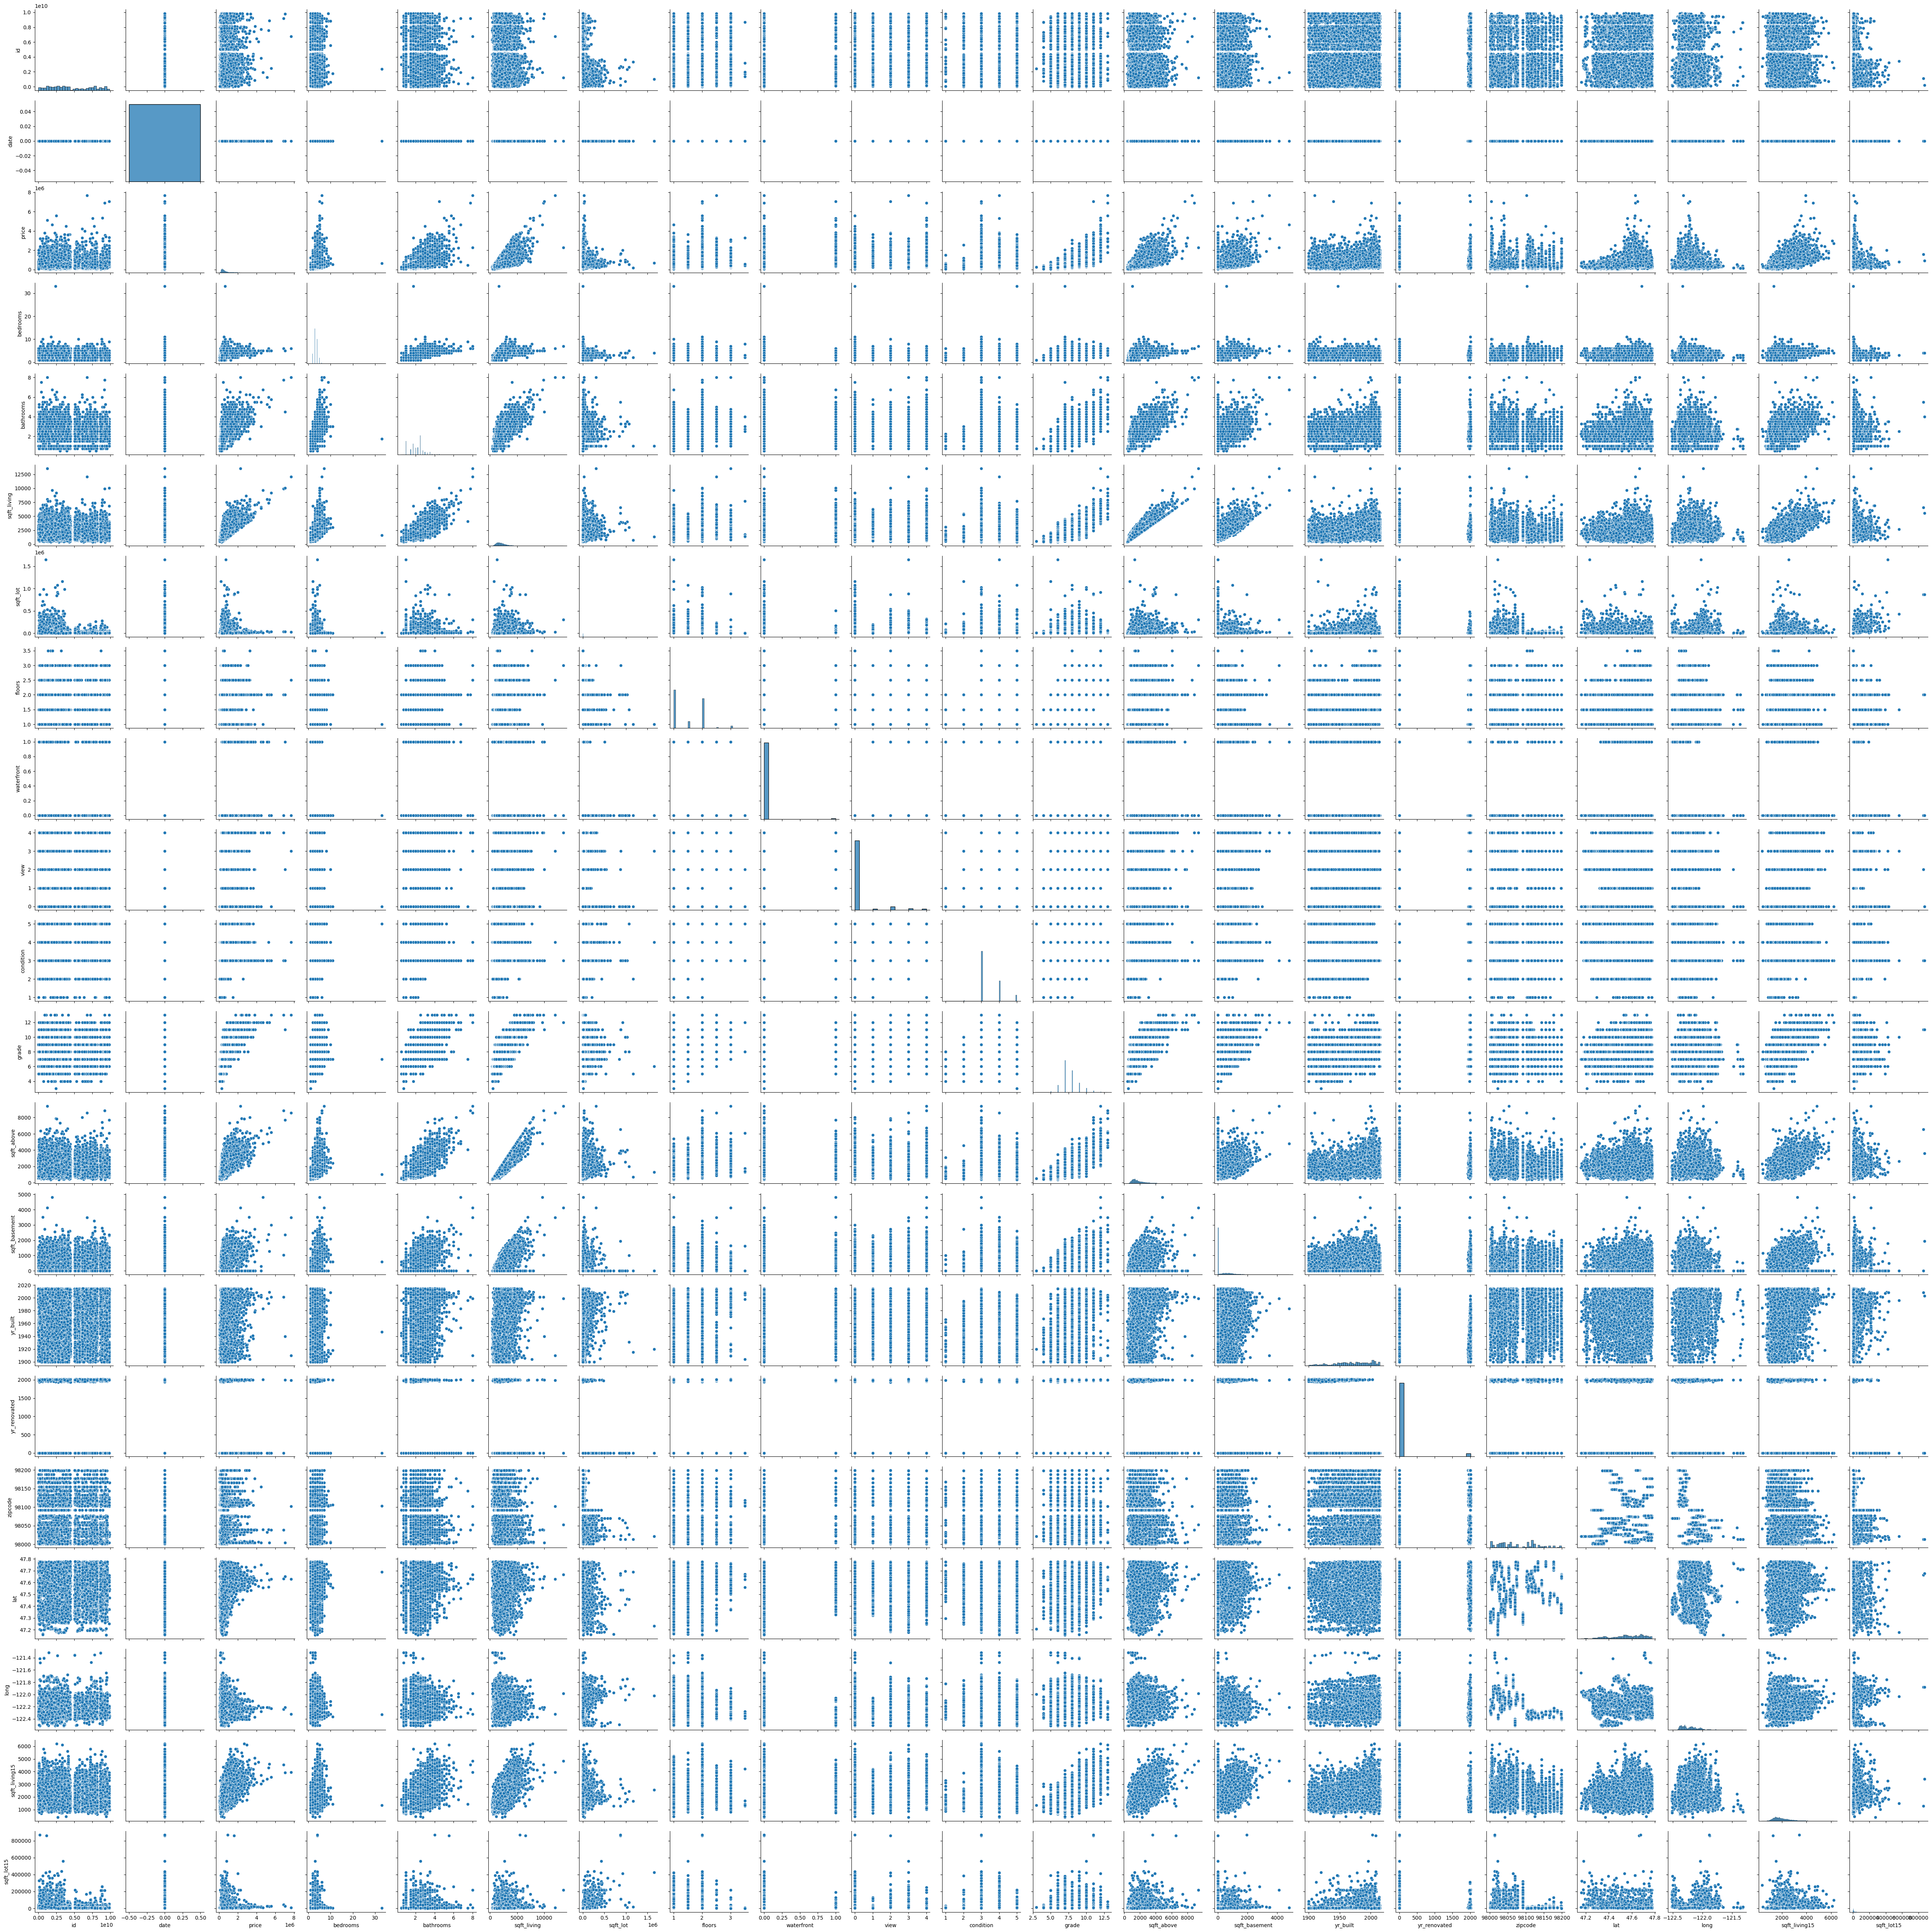

In [106]:
sns.pairplot(data)

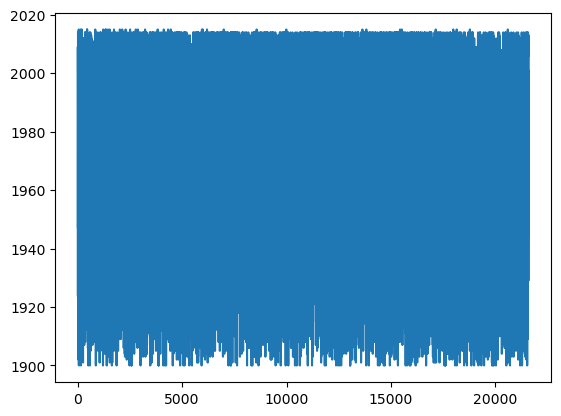

In [158]:
plt.plot(data.yr_built)

Text(0.5, 1.0, 'Price vs Longitude')

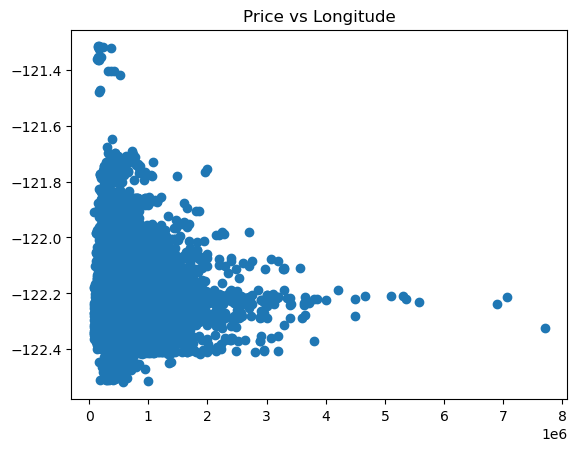

In [76]:
plt.scatter(data.price , data.long)
plt.title('Price vs Longitude')

Text(0.5, 1.0, 'Price vs Latitude')

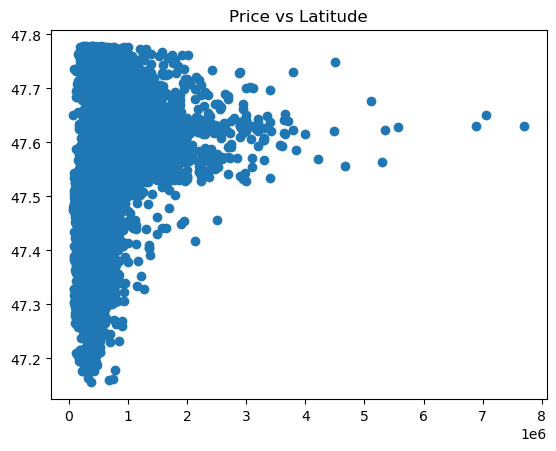

In [77]:
plt.scatter((data['price']),(data['lat']))
plt.title('Price vs Latitude')

Text(0.5, 1.0, 'Price vs No. of Bedrooms')

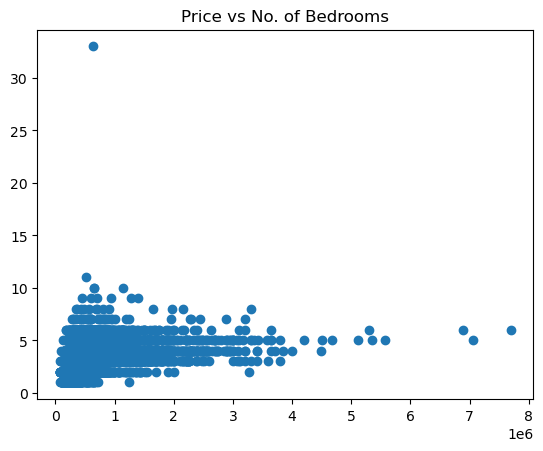

In [78]:
plt.scatter(data.price , data.bedrooms)
plt.title('Price vs No. of Bedrooms')

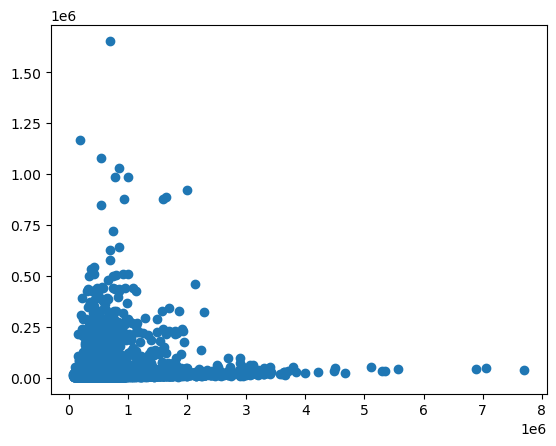

In [83]:
plt.scatter(data.price, (data.long+data.lat+data.bedrooms+data.bathrooms+data.floors+data.sqft_living+data.sqft_lot))

In [166]:
reg = LinearRegression()
labels = data['price']
conv_dates = [1 if (values>'2014') else 0 for values in data.date ] #1 means newly registered
data['date'] = conv_dates
train1 = data.drop(['id','price'], axis = 1)

In [143]:
data.yr_built.dtypes

dtype('int64')

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [164]:
data['date']

0        5/27/2015
1        5/24/2015
2        5/15/2015
3        5/14/2015
4        5/14/2015
           ...    
21592     5/2/2014
21593     5/2/2014
21594     5/2/2014
21595     5/2/2014
21596     5/2/2014
Name: date, Length: 21597, dtype: object

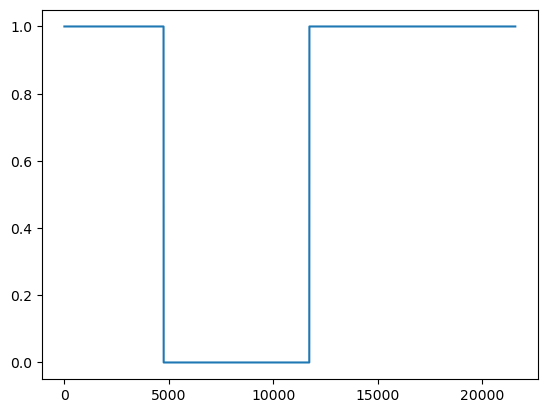

In [167]:
plt.plot(data.date)

In [159]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [168]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.20, random_state = 0)

In [169]:
reg.fit(x_train, y_train)

LinearRegression()

In [170]:
reg.score(x_test, y_test)

0.69327563896154

## 69% ACCURACY WE GOT :-(

### WE WILL USE - "GRADIENT BOOSTING REGRESSION"

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'squared_error')

#### n_estimator — The number of boosting stages to perform. We should not set it too high which would                                       overfit our model
#### max_depth — The depth of the tree node  
#### learning_rate — Rate of learning the data
#### loss — loss function 
#### minimum sample split — Number of sample to be split for learning the data

In [102]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [103]:
clf.score(x_test, y_test)

0.9044059899773769

# HURRAY! WE ACHIEVED 90.44 % ACCURACY